````{verbatim}
SPL       = Decl+
Decl      = VarDecl
          | FunDecl
VarDecl   = ('var' | Type) id  '=' FExp ';'
FunDecl   = id '(' [ FArgs ] ')' [ ':' RetType ] '{' VarDecl* Stmt+ '}'
RetType   = Type
          | 'Void'
Type      = BasicType
          | '[' Type ']'
          | id
BasicType = 'Int'
          | 'Bool'
          | 'Char'
FArgs     = [ FArgs ',' ] id [ ':' Type ]
Stmt      = 'if' '(' FExp ')' '{' Stmt* '}' [ 'else' '{' Stmt* '}' ]
          | 'while' '(' FExp ')' '{' Stmt* '}'
          | id [ Field ] '=' FExp ';'
          | FunCall ';'
          | 'return' [ FExp ] ';'
FExp      = Exp [ Field ]
Exp       = id
          | FExp Op2 FExp
          | Op1 FExp
          | int
          | char
          | 'False' | 'True'
          | '(' FExp ')'
          | FunCall
          | '[]'
Field     = '.' 'hd' | '.' 'tl'
FunCall   = id '(' [ ActArgs ] ')'
ActArgs   = FExp [ ',' ActArgs ]
Op2       = '+'  | '-' | '*' | '/'  | '%'
          | '==' | '<' | '>' | '<=' | '>=' | '!='
          | '&&' | '||'
          | ':'
Op1       = '!'  | '-'
int       = [ '-' ] digit+
id        = alpha ( '_' | alphaNum)*

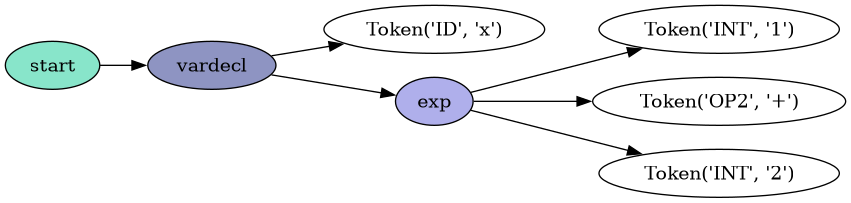

Tree('start', [Tree('vardecl', [Token('ID', 'x'), Tree('exp', [Token('INT', '1'), Token('OP2', '+'), Token('INT', '2')])])])


In [1]:
%reset -f 

from IPython.display import display
from PIL import Image
import lark
from spl_parser import spl_parser as parser


def plot_prgm(prgm):
    tree = parser.parse(prgm)
    lark.tree.pydot__tree_to_png(tree, 'tree.png')
    display(Image.open('tree.png'))
    print(tree)

# plot_prgm("var x = -(1 * 2 * 3 * 4);")
plot_prgm("var x = 1 + 2;")

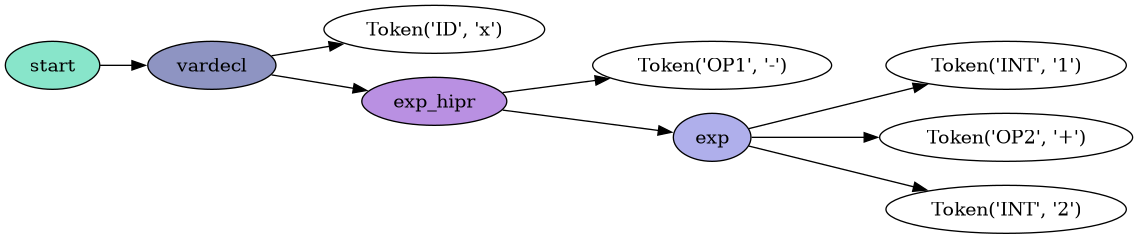

Tree('start', [Tree('vardecl', [Token('ID', 'x'), Tree('exp_hipr', [Token('OP1', '-'), Tree('exp', [Token('INT', '1'), Token('OP2', '+'), Token('INT', '2')])])])])


In [2]:

plot_prgm("var x = -(1 + 2);")

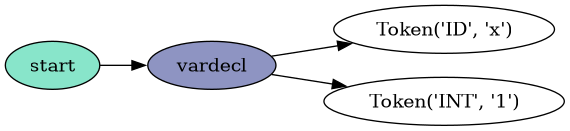

Tree('start', [Tree('vardecl', [Token('ID', 'x'), Token('INT', '1')])])


In [3]:
plot_prgm("var x = 1 ;")

In [4]:
from AST import UnaryOp, BinOp, Constant, Add, Sub, SPL

# Abstract Syntax
ast_1 = SPL(
            UnaryOp(
            Sub(),
            BinOp(
                Add(),
                Constant(1),
                Constant(2)
            ))) 

ModuleNotFoundError: No module named 'AST'

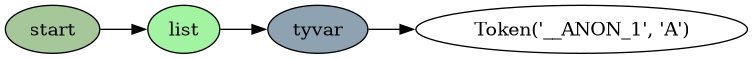

Tree('start', [Tree('list', [Tree('tyvar', [Token('__ANON_1', 'A')])])])


In [ ]:

import lark
from lark import Lark
from PIL import Image

grammar = """
start:      tyfap
tyfap:      "->" mu mu          -> function
            | "List" mu         -> list
            | TYPE              -> type
?mu :        "(" tyfap ")"
            | tyvar

tyvar:      /[a-zA-Z_][a-zA-Z0-9_]*/ -> tyvar
TYPE:       "Int" | "Bool"


%ignore /\\s/ 
        | /\\/\\/.*/

"""

parser = Lark(grammar, parser='lalr', debug=True)

def plot_prgm(prgm):
    tree = parser.parse(prgm)
    lark.tree.pydot__tree_to_png(tree, 'tree.png')
    display(Image.open('tree.png'))
    print(tree)

# plot_prgm("var x = -(1 * 2 * 3 * 4);")
plot_prgm("List A")
